In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
data = pd.read_csv('GSAF5.csv', engine='python')


In [2]:
#miro la forma para ver de que esta compuesta
data.shape


(5992, 24)

In [3]:
#analizo los elementos nulos de cada columna
null_cols = data.isnull().sum()


In [4]:
#Elimino las columnas que no necesito
datan = data.drop(columns=['Unnamed: 22', 'Unnamed: 23', 'Investigator or Source','pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'Species ', 'Time'])

In [5]:
#Elimino los años que estan a cero

In [6]:
datani = datan[datan.Year != 0]

In [7]:
datanis = datani[datani.Year > 1940]

In [8]:
datanis['Date'] = datanis['Date'].str.replace('-', ' ')
datanis['Date'] = datanis['Date'].str.replace('\d+', '')
datanis['Date'] = datanis['Date'].str.replace('Reported', '')
datanis['Date'] = datanis['Date'].str.replace('Early', '')
datanis['Date'] = datanis['Date'].str.replace('Late', '')
datanis['Date'] = datanis['Date'].str.replace(' ', '')
datanis['Date'] = datanis['Date'].str.replace('Summer, summer, summerof ', '')

/usr/local/Cellar/ipython/7.3.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/Cellar/ipython/7.3.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/Cellar/ipython/7.3.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [9]:
df = datanis[datanis.Date != ""]

In [10]:
#ass = df.Date.value_counts().head(12).index


In [11]:
df2 = df[df["Date"].isin(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug', 'Sep','Oct','Nov','Dec'])]

In [12]:
dasa = df2.drop(columns=['Case Number','Location','Name','Age'])


In [13]:
dasa=dasa.rename(columns = {'Sex ':'Sex'})
dasa=dasa.rename(columns = {'Fatal (Y/N)':'Fatal'})
dasa=dasa.rename(columns = {'Date':'Month'})

In [14]:
dasa1 = dasa[dasa["Sex"].isin(['M', 'F'])]

In [15]:
dasa1['Fatal'] = dasa1['Fatal'].str.replace(' N', 'N')

/usr/local/Cellar/ipython/7.3.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
dasa.to_csv('cleaned.csv')

In [17]:
nuevo = dasa.drop(columns=['Type', 'Area', 'Activity', 'Injury', 'Sex', 'original order', 'Month'])
#nuevo['Frate'] =
cuantos=nuevo.groupby(['Country','Fatal']).count() 
ss=nuevo.Country.str.lower()
nuevo.Country=ss
nuevo['Country'] = nuevo['Country'].str.replace('usa', 'united states')
nuevo2=nuevo
#nuevo.Country.value_counts().head(30)
#nuevo2 = nuevo[nuevo["Country"].isin(['united states of america','australia','south africa','brazil','papua new guinea','bahamas','new zealand','mexico', 'reunion','new caledonia','italy','fiji', 'mozambique', 'philippines', 'japan', 'egypt',  ])]

In [18]:
paises = pd.read_csv('paises.csv', engine='python')
paises = paises.drop([paises.columns[2], paises.columns[3]], axis='columns')
pais=paises.drop_duplicates()
lo=pais.Entity.str.lower()
pais.Entity=lo


/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [19]:
shapefile = 'ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf = gdf.drop(gdf.index[159])
code = gdf.country_code.to_list()


In [20]:
#nuevo2 debe contener el code
#pais es el que hay que mergear
merged = nuevo2.merge(pais, left_on = 'Country', right_on = 'Entity')
#merged.Country.value_counts()
merged['Fatal'] = merged['Fatal'].str.replace(' N', 'N')


In [21]:
merged['Fatal'].fillna('UNKNOWN', inplace=True)


In [22]:
mergeado = merged.drop(columns=['Entity'])

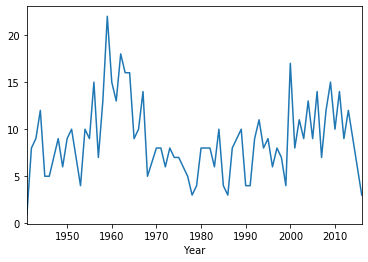

In [23]:
%matplotlib inline
mergeado[mergeado["Fatal"]=="Y"].groupby(["Year"]).count()['Fatal'].plot()

Grafico de muertes desde 1940 hasta 2016

In [24]:
prueba = mergeado
prueba.head()

,Year,Country,Fatal,Code
0,2016,united states,N,USA
1,2016,united states,N,USA
2,2016,united states,N,USA
3,2016,united states,N,USA
4,2016,united states,N,USA


In [25]:
asss=pd.DataFrame()

In [26]:
asss['Muertos']= prueba[prueba["Fatal"]=="Y"].groupby(["Code","Year"]).count()["Fatal"]
asss

Muertos
Code Year         
AUS  1941        1
     1942        3
     1943        1
     1944        1
     1945        1
     1946        4
     1947        2
     1948        3
     1949        4
     1950        3
     1951        4
     1954        3
     1955        3
     1956        2
     1958        2
     1959        2
     1960        1
     1961        3
     1962        3
     1963        2
     1964        2
     1965        1
     1966        2
     1967        4
     1971        2
     1972        2
     1974        1
     1975        3
     1976        1
     1977        4
...            ...
ZAF  1975        2
     1978        3
     1979        1
     1980        3
     1981        1
     1982        1
     1983        2
     1984        3
     1985        2
     1986        1
     1987        1
     1988        1
     1989        1
     1990        1
     1994        2
     1995        1
     1997        2
     1998        1
     1999        1
     2003        3
     2004        2
     2005        1
     2006        1
     2007        1
     2009        6
     2010        2
     2011        3
     2012        3
     2013        1
     2014        1

[393 rows x 1 columns]

In [28]:
asss = asss.reset_index().rename_axis(None).rename_axis(None, axis=1)


In [29]:
import json
#Read data to json.
merged_json = json.loads(asss.to_json())
#Convert to String like object.
json_data = json.dumps(merged_json)